# EDA and Cleaning

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

## Exploring the Data

In [5]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
train.shape

(2051, 81)

In [7]:
test.shape

(878, 80)

In [8]:
# First thing I would like to do is change my column names so that they are all lowercase and spaces
# are replaced with underscores.
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [9]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
# Checking to see the columns with the most missing data
train.isnull().sum().sort_values(ascending=False).head(30)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
mas_vnr_type      1240
fireplace_qu      1000
lot_frontage       330
garage_qual        114
garage_finish      114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

In [11]:
# lets see the unique values of the top 6 to investigate
train['pool_qc'].unique()
train['misc_feature'].unique()
train['fence'].unique()
train['mas_vnr_type'].unique()
#train['Fireplace Qu'].unique()
# Pool QC means no pool
train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [12]:
# pool qc NaN are no pool so we will change null to none
train['pool_qc'] = train['pool_qc'].fillna('Not')
test['pool_qc'] = test['pool_qc'].fillna('Not')

In [13]:
# we will do the same for the other 5 columns since in the dictionar, NaN means 'none'
train['alley'] = train['alley'].fillna('Not')
test['alley'] = test['alley'].fillna('Not')

train['fence'] = train['fence'].fillna('Not')
test['fence'] = test['fence'].fillna('Not')

train['mas_vnr_type'] = train['mas_vnr_type'].fillna('Not')
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('Not')

train['misc_feature'] = train['misc_feature'].fillna('Not')
test['misc_feature'] = test['misc_feature'].fillna('Not')

train['fireplace_qu'] = train['fireplace_qu'].fillna('Not')
test['fireplace_qu'] = test['fireplace_qu'].fillna('Not')

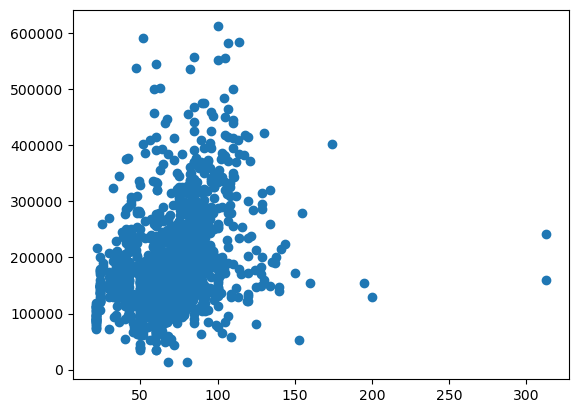

In [14]:
# Time to explore Lot Frontage
plt.scatter(x='lot_frontage', y='saleprice', data=train)

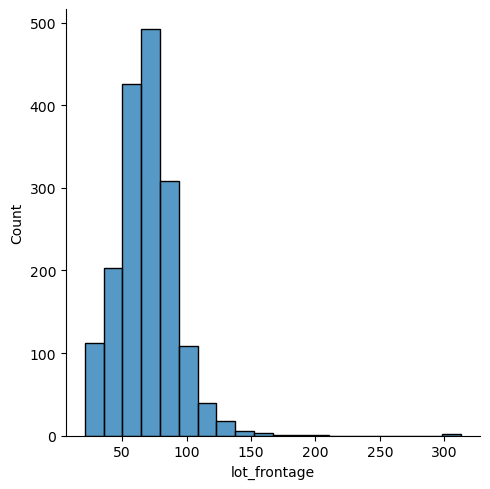

In [15]:
# lets see a distribution of lot_frontage
sns.displot(train, x="lot_frontage", bins=20)

In [16]:
# Will look at some example observations to see if I can find a pattern
pd.set_option('display.max_columns', None)
train.query('lot_frontage.isnull()')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,Not,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Not,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Not,Not,Not,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,Not,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,Not,MnPrv,Not,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,Not,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,Not,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,Not,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,Not,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,Not,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Not,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Not,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,Not,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,Not,Not,Not,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,Not,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,Not,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,Not,GdWo,Not,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,Not,Not,Not,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,Not,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,Not,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,Gd,TA,

In [17]:
# My best judgement says there is no lot frontage and so I will replace NaN with 0.
train['lot_frontage'] = train['lot_frontage'].fillna(0)
test['lot_frontage'] = test['lot_frontage'].fillna(0)

In [18]:
# GarageCond is similar to top 6 so fill with none
train['garage_cond'] = train['garage_cond'].fillna('Not')
test['garage_cond'] = test['garage_cond'].fillna('Not')

In [19]:
# Same with GarageType, Garage Cond, Garage Qual, and Garage Finish. garage year built will remain NaN since it is due to no garage and column
# is an int column.
train['garage_type'] = train['garage_type'].fillna('Not')
test['garage_type'] = test['garage_type'].fillna('Not')

train['garage_qual'] = train['garage_qual'].fillna('Not')
test['garage_qual'] = test['garage_qual'].fillna('Not')

train['garage_finish'] = train['garage_finish'].fillna('Not')
test['garage_finish'] = test['garage_finish'].fillna('Not')

In [20]:
# Similar issue with Bsmt group
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('Not')
test['bsmt_exposure'] = test['bsmt_exposure'].fillna('Not')

train['bsmtfin_type_2'] = train['bsmtfin_type_2'].fillna('Not')
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].fillna('Not')

train['bsmtfin_type_1'] = train['bsmtfin_type_1'].fillna('Not')
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].fillna('Not')

train['bsmt_qual'] = train['bsmt_qual'].fillna('Not')
test['bsmt_qual'] = test['bsmt_qual'].fillna('Not')

train['bsmt_cond'] = train['bsmt_cond'].fillna('Not')
test['bsmt_cond'] = test['bsmt_cond'].fillna('Not')

In [21]:
# TESTING entering 0 for Mas Vnr Are considering it means none
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [22]:
# Bsmt Bath null investigation
train['bsmt_full_bath'].unique()
pd.set_option('display.max_columns', None)
train.query('bsmt_full_bath.isnull()')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,Not,0.0,TA,TA,Slab,Not,Not,Not,Not,0.0,Not,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,Not,Not,Not,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,Not,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,Not,0.0,TA,TA,PConc,Not,Not,Not,Not,NaN,Not,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Not,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,Not,MnPrv,Not,0,4,2008,ConLD,79000


In [23]:
train.query('bsmt_half_bath.isnull()')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,Not,0.0,TA,TA,Slab,Not,Not,Not,Not,0.0,Not,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,Not,Not,Not,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,Not,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,Not,0.0,TA,TA,PConc,Not,Not,Not,Not,NaN,Not,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Not,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,Not,MnPrv,Not,0,4,2008,ConLD,79000


Both Bsmt Full Bath and Bsmt Half Bath are the same observation and we can see they have no Bsmt so it makes sense to assign a value of 0 for both.

In [25]:
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)
test['bsmt_full_bath'] = test['bsmt_full_bath'].fillna(0)

train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)
test['bsmt_half_bath'] = test['bsmt_half_bath'].fillna(0)

Now will tackle the bsmt units that are null.

In [27]:
train.query('total_bsmt_sf.isnull()')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,Not,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,Not,0.0,TA,TA,PConc,Not,Not,Not,Not,NaN,Not,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,Not,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,Not,MnPrv,Not,0,4,2008,ConLD,79000


Looks like this observation has the other 3 NaN values related to basement. It has no basement so we will replace with 0.

In [29]:
train['total_bsmt_sf'] = train['total_bsmt_sf'].fillna(0)
test['total_bsmt_sf'] = test['total_bsmt_sf'].fillna(0)

train['bsmt_unf_sf'] = train['bsmt_unf_sf'].fillna(0)
test['bsmt_unf_sf'] = test['bsmt_unf_sf'].fillna(0)

train['bsmtfin_sf_2'] = train['bsmtfin_sf_2'].fillna(0)
test['bsmtfin_sf_2'] = test['bsmtfin_sf_2'].fillna(0)

train['bsmtfin_sf_1'] = train['bsmtfin_sf_1'].fillna(0)
test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].fillna(0)

Now last two null variables we will deal with is garage variables

In [31]:
train.query('garage_cars.isnull()')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,Not,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,Not,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Not,Detchd,NaN,Not,NaN,NaN,Not,Not,Y,174,0,212,0,0,0,Not,MnPrv,Not,0,3,2007,WD,150909


Looks like this observation has the last two NaN values we were looking for. It looks like this observation has no garage and so we will convert the null to 0.

In [33]:
train['garage_cars'] = train['garage_cars'].fillna(0)
test['garage_cars'] = test['garage_cars'].fillna(0)

train['garage_area'] = train['garage_area'].fillna(0)
test['garage_area'] = test['garage_area'].fillna(0)

### Verifying datatypes

In [35]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,Not,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Not,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Not,Not,Not,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,Not,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Not,Not,Not,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Not,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,Not,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Not,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Not,Not,Not,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Not,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Not,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Not,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Not,Not,Not,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,Not,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,Not,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Not,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Not,Not,Not,0,3,2010,WD,138500


In [36]:
pd.set_option('display.max_rows', None)
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

Datatypes look in order now I will briefly look for outliers using .describe

In [38]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


There doesn't seem to be any outrageous outliers and so I will want my model to work with as much raw data as possible.

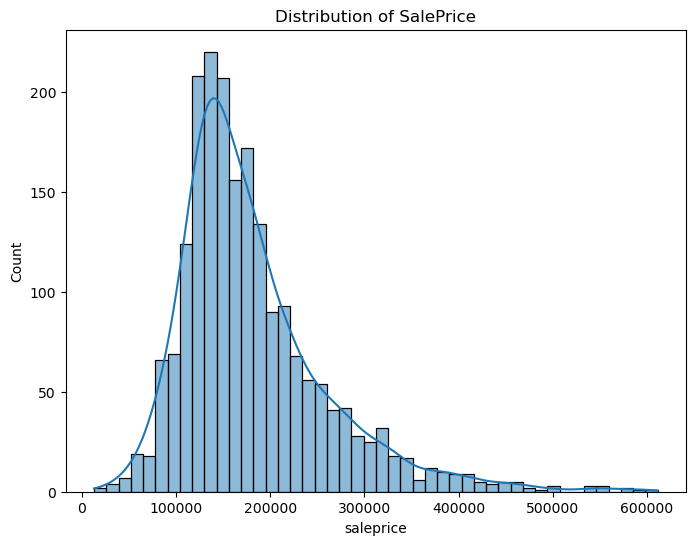

In [40]:
# I would like to see the distribution of sale price is normal
plt.figure(figsize=(8, 6))
sns.histplot(train['saleprice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

It looks like the distribution of sale price is skewed to the right.

In [42]:
# I cannot make a correlation map because my train data has qualitative and quantitave
# variables so I will make 2 seperate list with eich respective datatype.
# [It turns out I can using corr(numeric_only) but its still usefull to have these]
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

<Axes: >

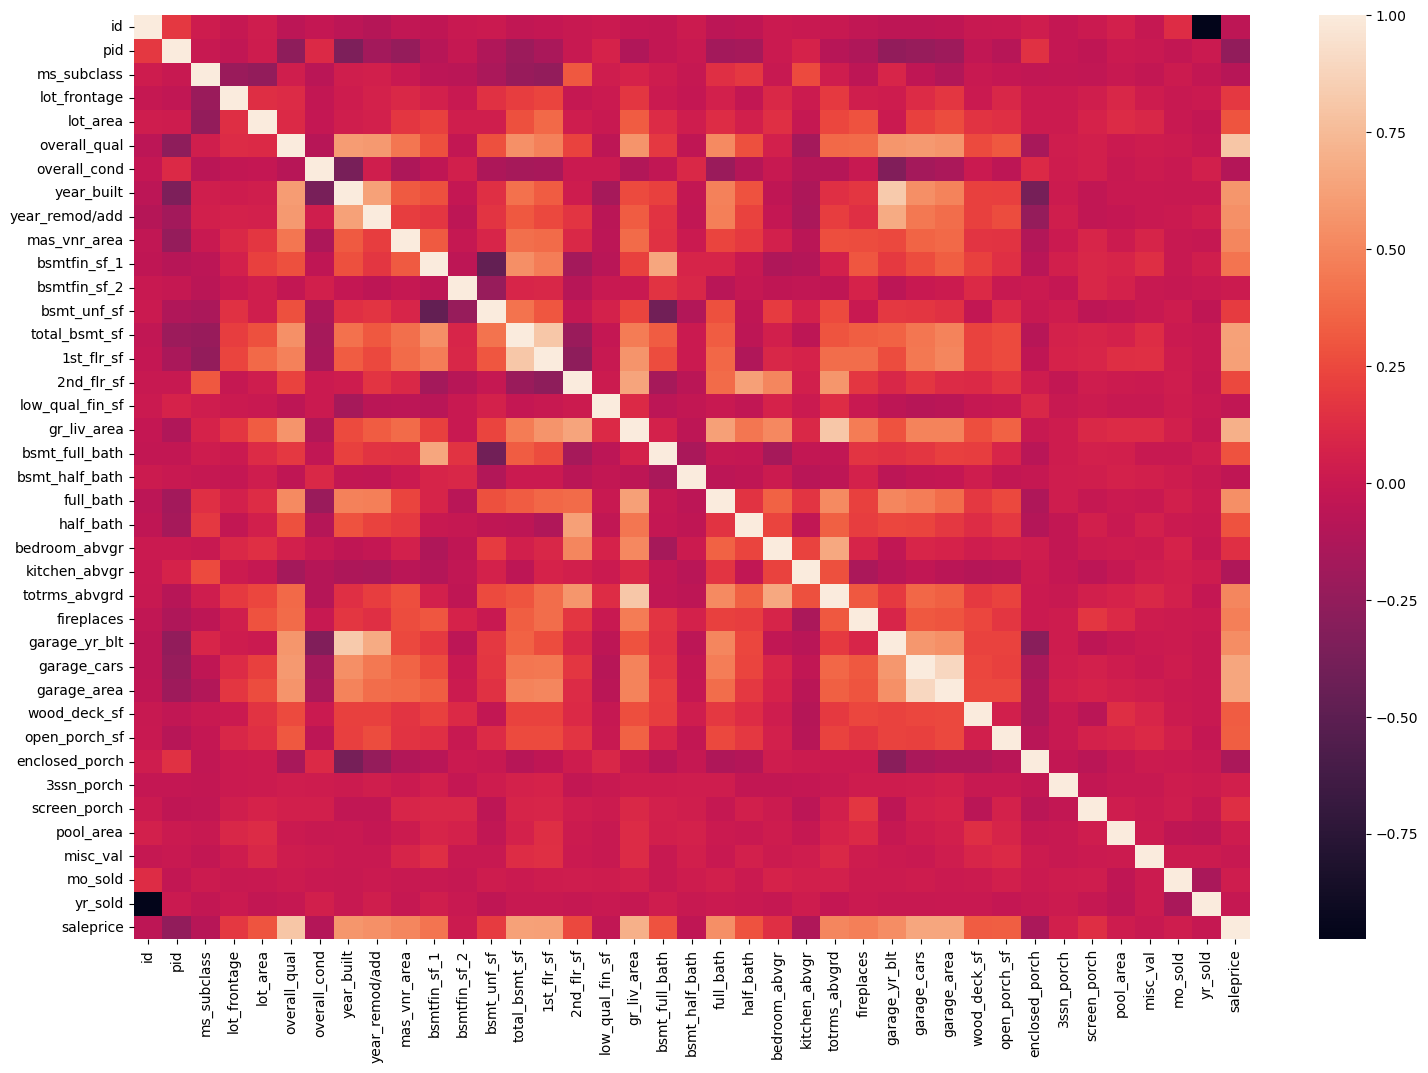

In [43]:
# Correlation matrix
corr = train[quantitative].corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr)

Off the bat we can see overall_qual is very highly correlated with saleprice, as well as gr_liv_area.

In [45]:
train.shape

(2051, 81)

In [46]:
test.shape

(878, 80)

Now that I am comfortable with the surface level of cleaning, I will save both test and train data as seperate csv files.

In [48]:
train.to_csv('../datasets/train_cleaned.csv', index=False)
test.to_csv('../datasets/test_cleaned.csv', index=False)

In the next notebooks we will feature engineer and proccess data to best fit different models and then evaluate them.

### Making a basic baseline regression model using 'Overall Qual' variable.

In [51]:
# Asigning X and y
X = train[['overall_qual']]
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Init and fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Making the predictions for X_test and X_train
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

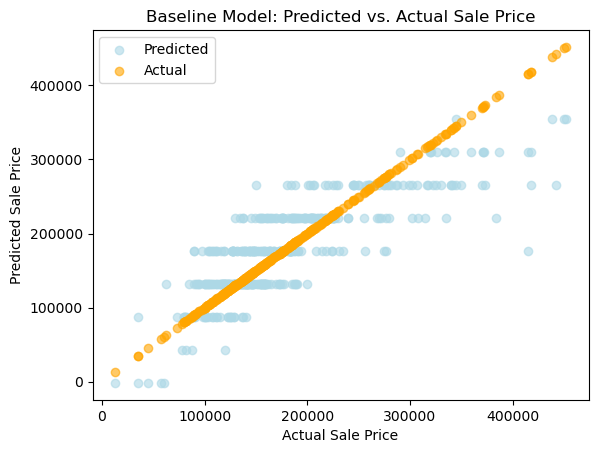

In [54]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_test_pred, color='lightblue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='orange', alpha=0.6, label='Actual')

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Baseline Model: Predicted vs. Actual Sale Price")

# legend
plt.legend()
plt.savefig('../images/baseline_pred_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

This visual shoes us that this model does poorly at predicting the actual value. Lets check some metrics.

In [56]:
# Still baseline model
X = train[['overall_qual']]
y = train[['saleprice']]

lr = LinearRegression()
lr.fit(X, y) 

LinearRegression()

In [57]:
#Make Predictions
preds = lr.predict(test[['overall_qual']])

In [58]:
preds_train = lr.predict(train[['overall_qual']])

In [59]:
np.sqrt(mean_squared_error(y, preds_train))

47521.73682325998

The RMSE of this baseline model is pretty poor. It may need some feature engineering because it could be suffering from underfitting or high bias.

In [61]:
#Save Predictions for submission
submission = pd.DataFrame({'id': test['id']})
submission['saleprice'] = preds
submission.head()

,id,saleprice
0,2658,176483.047320
1,2718,132015.099723
2,2414,220950.994917
3,1989,132015.099723
4,625,176483.047320


In [62]:
submission.to_csv('../datasets/simple_submission.csv', index=False)